In [66]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

import scipy.cluster

In [42]:
#Exircise 1
a = np.random.random((10, 3))
near = a[np.arange(10),np.absolute(a - 0.5).argmin(axis = 1)]
print(a)
near

[[0.84370305 0.74315426 0.07972764]
 [0.73605095 0.14041639 0.19543896]
 [0.44724062 0.06479896 0.06108643]
 [0.15736082 0.62661379 0.74151597]
 [0.68551532 0.96320325 0.40590487]
 [0.61230686 0.27753256 0.99925377]
 [0.20747488 0.88366365 0.67577048]
 [0.90095579 0.13829926 0.48302087]
 [0.24576921 0.63604493 0.8093776 ]
 [0.07303403 0.3656496  0.41157234]]


array([0.74315426, 0.73605095, 0.44724062, 0.62661379, 0.40590487,
       0.61230686, 0.67577048, 0.48302087, 0.63604493, 0.41157234])

In [40]:
#Exercise 2
a = np.random.random((6,6))
b = a.sum(axis = 1)/a.min(axis = 0)
print(a)
b

[[0.40487831 0.65757798 0.23454218 0.88196259 0.18129067 0.45651392]
 [0.39207456 0.45502963 0.56160925 0.03544999 0.27419151 0.43249465]
 [0.22821349 0.42166803 0.69299632 0.93679155 0.27667232 0.80175364]
 [0.22258578 0.37683817 0.28694033 0.03574493 0.59776132 0.97192301]
 [0.15249349 0.36278723 0.40454694 0.95269569 0.03935872 0.67084771]
 [0.38304063 0.02422877 0.2790014  0.99271568 0.25049449 0.56252453]]


array([18.47138259, 88.77254494, 14.31766077, 70.2903857 , 65.62026872,
        5.76193374])

In [57]:
#Exercise 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 0, 100])
mask = x == 0
#print(mask[:-1])
#x[1:]
x[1:][mask[:-1]].max()

100

In [59]:
#Exercise 4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x)
np.add.at(x, i, 1)

print(x)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [65]:
#Exercises 5
a = np.arange(16).reshape(4, 4)
n = a.shape[0]
#for i in range(2 * n - 1):
dictionary = {i : [a[j, i - j] for j in range(i + 1) if j < n and i - j < n] for i in range(n * 2 - 1)}
print(a)
dictionary

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


{0: [0],
 1: [1, 4],
 2: [2, 5, 8],
 3: [3, 6, 9, 12],
 4: [7, 10, 13],
 5: [11, 14],
 6: [15]}

In [159]:
def get_labels(points, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist = np.hstack([np.linalg.norm(points - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)


In [160]:
#Exercise 6
#k-means
import matplotlib.pyplot as plt




data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
def get_distance(points, centroids, labels):
    return sum( \
        np.linalg.norm(points[labels == label] - centroids[label], axis=1).sum() \
            for label in range(centroids.shape[0]) \
    ) / points.shape[0]
def kmeans(obs, k_or_guess, iter = 10, eps = 1e-05):
    if not isinstance(k_or_guess, np.ndarray):
        centroids = np.random.random((k_or_guess, obs.shape[1]))
    else:
        centroids = np.copy(k_or_guess)
    labels = get_labels(obs, centroids)
    distance = get_distance(obs, centroids, labels)
    min_distance = distance
    real_centers = centroids
    while True:
        centroids = np.array([obs[labels == label].mean(axis=0) for label in range(centroids.shape[0])])
        labels = get_labels(obs, centroids)
        past_distance = distance
        distance = get_distance(obs, centroids, labels)
        if distance < min_distance:
            min_distance = distance
            real_centers = centroids
        if not isinstance(k_or_guess, np.ndarray):
            iter -= 1
            if iter == 0:
                break
        
        if abs(distance - past_distance) < eps:
            break

    return real_centers, min_distance




In [161]:
#labels = get_labels(data, centroids)

C:\Users\Kristina Kuslina\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


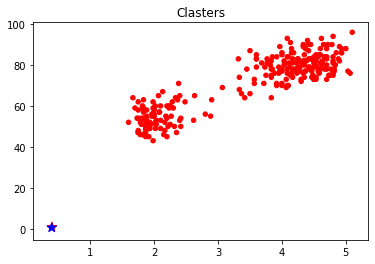

In [163]:
import scipy.cluster

data_centroids, data_distance = kmeans(data, 2)
data_labels = get_labels(data, data_centroids)

plt.scatter(*data.T, c=np.where(data_labels, "blue", "red"), s=20)
plt.scatter(*data_centroids.T, c=["red", "blue"], s=95, marker='*')
plt.title('Clasters')
plt.show()
